## 최종 머신러닝 모델

## 전처리
저는 제 컴퓨터로 돌려서 cuda 기반 GPU 모델을 사용하였기에 CPU나 Colab으로 돌리고자 할 경우 CPU 기반으로 학습부분과 평가부분을 수정해야 합니다. 추가로 colab으로 돌릴경우 mount 부분도 수정해야 합니다. 
1. 데이터 로드
2. 배경제거
3. 그레이스케일
4. 이진화
5. 센터링
6. HOG 추출
7. 모델 학습
8. Validation

로컬 데이터 불러오는중...
학습 데이터 로딩 중...
검증 데이터 로딩 중...
증강 ALL 검증 데이터 로딩 중...
증강 rotate 검증 데이터 로딩 중...
증강 scale 검증 데이터 로딩 중...
증강 shear 검증 데이터 로딩 중...
증강 shift 검증 데이터 로딩 중...

원본 학습 데이터 Shape: (60000, 28, 28, 3)

배경 제거 중 (코너 기반 Rule-based)...
배경 제거 후 학습 데이터 Shape: (60000, 28, 28, 3)
배경 제거 후 검증 데이터 Shape: (10000, 28, 28, 3)

배경제거 결과 시각화...


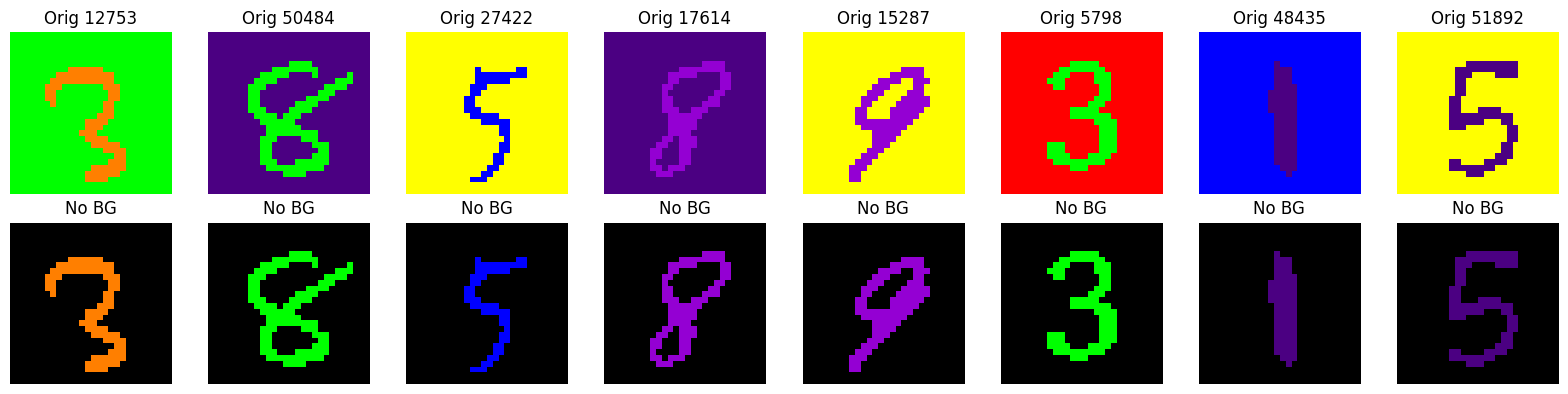


색상 분류용 데이터 (원본 Color): (60000, 2352)
색상 분류용 데이터 (배경제거 Color): (60000, 2352)

배경 제거된 이미지 Grayscale 변환 중...
train nobg data 그레이스케일중...
val nobg data 그레이스케일중...
val all nobg data 그레이스케일중...
val rotate nobg data 그레이스케일중...
val scale nobg data 그레이스케일중...
val shear nobg data 그레이스케일중...
val shift nobg data 그레이스케일중...


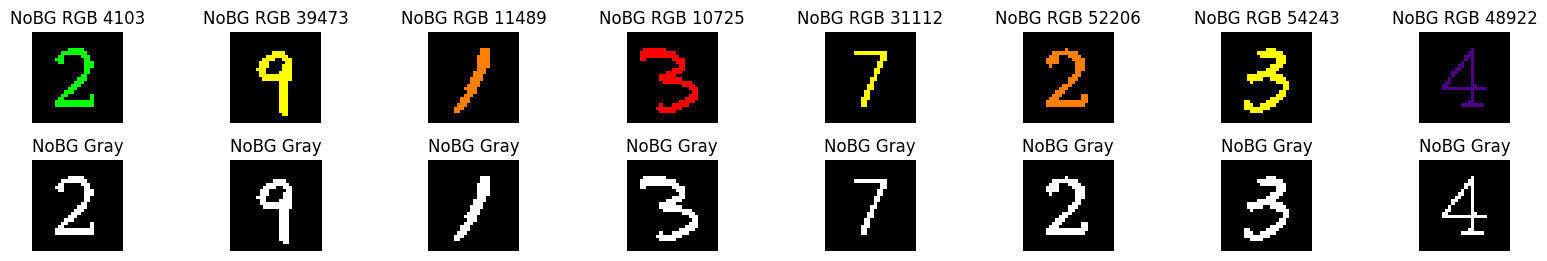

배경제거+Grayscale Flatten Shape (Train, Val): (60000, 784) (10000, 784)
배경제거+Grayscale Flatten Shape (all, rotate, scale, shear, shift): (10000, 784) (10000, 784) (10000, 784) (10000, 784) (10000, 784)
픽셀 밝기 분포 분석 중...


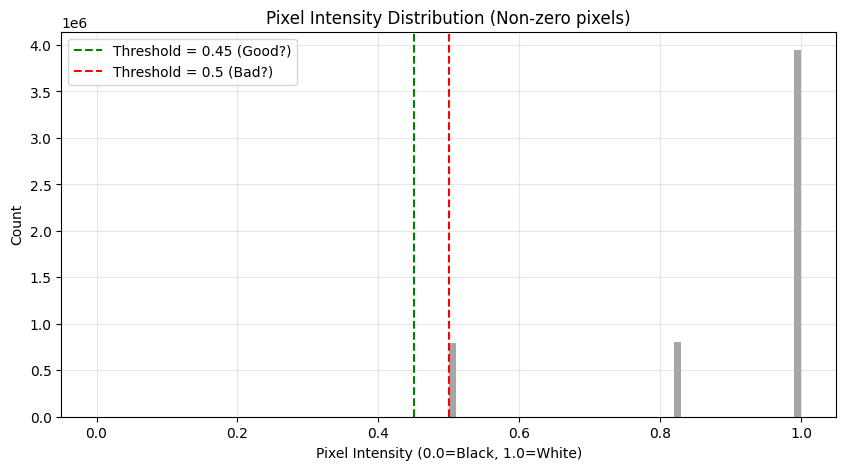

>>> 전체 데이터 60000장의 0.4 ~ 0.6 구간 정밀 분석 중...
   -> 해당 구간 픽셀 수: 798,423개


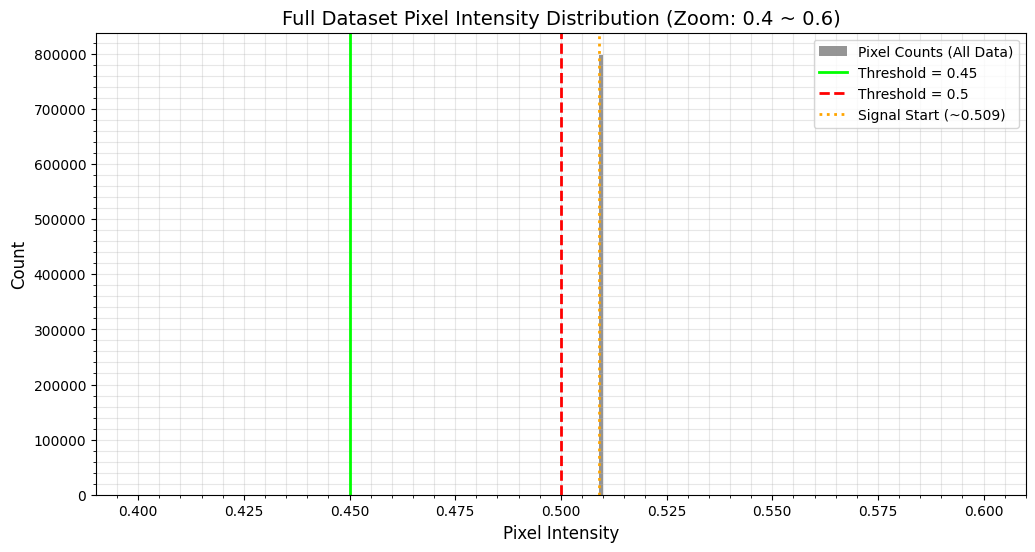


위 그래프를 참고하여 Grayscale 이미지 이진화 임계값(Threshold) 0.5 설정 중...

Grayscale 이미지 이진화 적용 중 (Threshold=0.5)...
이진화 학습 데이터 Shape: (60000, 28, 28)
이진화 검증 데이터 Shape: (10000, 28, 28)
이진화 증강 검증 데이터 (all, rotate, scale, shear, shift): (10000, 28, 28) (10000, 28, 28) (10000, 28, 28) (10000, 28, 28) (10000, 28, 28)
이진화 학습 Flatten Shape: (60000, 784)
이진화 증강 검증 데이터 flatten (all, rotate, scale, shear, shift): (10000, 784) (10000, 784) (10000, 784) (10000, 784) (10000, 784)


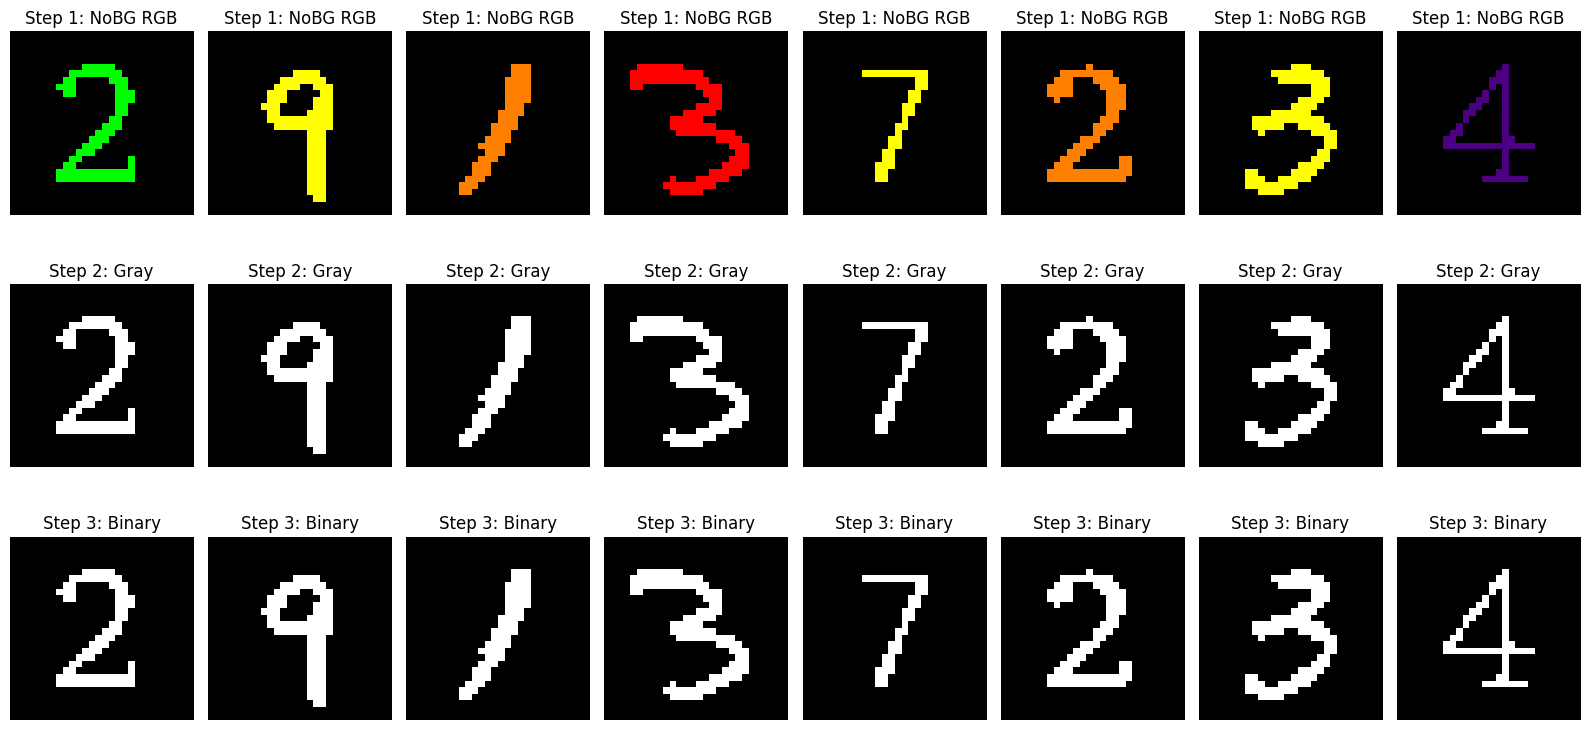


--- 데이터 Centering 재실행 (선명하게) ---


Centering Images (Binary Safe):   0%|          | 0/60000 [00:00<?, ?it/s]

Centering Images (Binary Safe):   0%|          | 0/10000 [00:00<?, ?it/s]

Centering Images (Binary Safe):   0%|          | 0/10000 [00:00<?, ?it/s]

Centering Images (Binary Safe):   0%|          | 0/10000 [00:00<?, ?it/s]

Centering Images (Binary Safe):   0%|          | 0/10000 [00:00<?, ?it/s]

Centering Images (Binary Safe):   0%|          | 0/10000 [00:00<?, ?it/s]

Centering Images (Binary Safe):   0%|          | 0/10000 [00:00<?, ?it/s]


[시각화] 수정된 Centering 결과 (선명함 유지 확인)


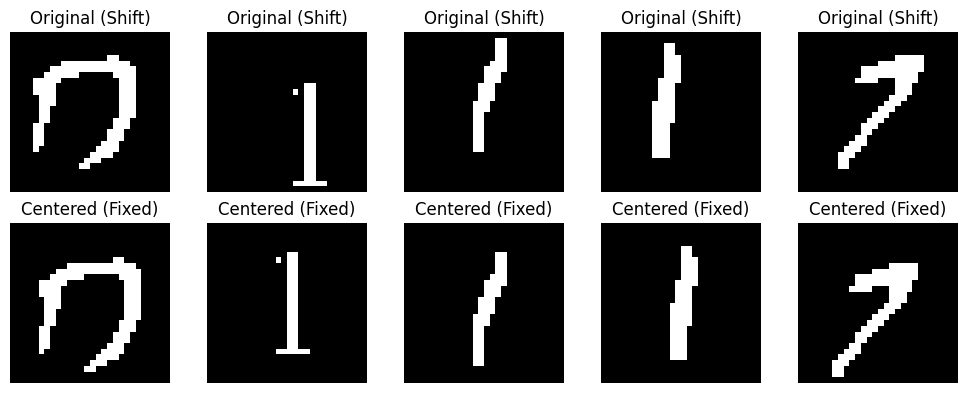


--- HOG 피처 추출 (Centered Input) ---
1. 학습 데이터(X_train_centerded) HOG 변환 중...


HOG Extraction:   0%|          | 0/60000 [00:00<?, ?it/s]

2. 검증 데이터(X_val_centered) HOG 변환 중...


HOG Extraction:   0%|          | 0/10000 [00:00<?, ?it/s]

3. 증강 ALL 검증 데이터(X_val_all_centered) HOG 변환 중...


HOG Extraction:   0%|          | 0/10000 [00:00<?, ?it/s]

4. 증강 rotate 검증 데이터(X_val_rotate_centered) HOG 변환 중...


HOG Extraction:   0%|          | 0/10000 [00:00<?, ?it/s]

5. 증강 scale 검증 데이터(X_val_scale_centered) HOG 변환 중...


HOG Extraction:   0%|          | 0/10000 [00:00<?, ?it/s]

6. 증강 shear 검증 데이터(X_val_shear_centered) HOG 변환 중...


HOG Extraction:   0%|          | 0/10000 [00:00<?, ?it/s]

7. 증강 shift 검증 데이터(X_val_shift_centered) HOG 변환 중...


HOG Extraction:   0%|          | 0/10000 [00:00<?, ?it/s]

   -> Final HOG Feature Shape: (60000, 1296)


In [31]:
import numpy as np #기본 수치계산용
import os #파일경로용
import time #시간측정용
import cupy as cp #CUDA 가속용
#from google.colab import drive #구글드라이브 마운트용
from tqdm.notebook import tqdm #진행상황바
from skimage.feature import hog #HOG 특성 추출용
import matplotlib.pyplot as plt #시각화용

# 3개의 핵심 모델 임포트
#from sklearn.ensemble import RandomForestClassifier
from cuml.ensemble import RandomForestClassifier as cuRF #cuml RandomForest / CUDA 가속
import xgboost as xgb #XGBoost 
import lightgbm as lgb #LightGBM


from cuml.metrics import accuracy_score as cuml_accuracy_score #cuml 버전 accuracy
from cuml.metrics import roc_auc_score as cuml_roc_auc_score #cuml 버전 roc-auc
from sklearn.metrics import accuracy_score as sk_accuracy_score #sklearn 버전 accuracy
from sklearn.metrics import roc_auc_score as sk_roc_auc_score #sklearn 버전 roc-auc
from sklearn.metrics import classification_report as sk_classification_report #sklearn 버전 classification report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #혼동행렬 시각화
from scipy.ndimage import center_of_mass, shift #Center of Mass 계산 및 이미지 이동용
import warnings #경고무시용
warnings.filterwarnings("ignore", message="X does not have valid feature names") #XGBoost 경고무시
warnings.filterwarnings("ignore", message="Using CPU for workflow synchronization") #cuml 경고무시
# ===============================
# 1. 데이터 불러오기
# ===============================
print("로컬 데이터 불러오는중...")

BASE_DIR = 'Data'
SAVE_PATH_TRAIN = os.path.join(BASE_DIR, 'colored_mnist_train.npz') # 증강되지 않은 원본 학습 데이터
SAVE_PATH_VAL = os.path.join(BASE_DIR, 'colored_mnist_val.npz') # 증강되지 않은 원본 검증 데이터
SAVE_PATH_VAL_ALL = os.path.join(BASE_DIR, 'colored_mnist_valid_all.npz') #증강 ALL은 1만개의 모든 숫자가 rotate, sclae, shear, shift 증강이 전부 적용된 데이터셋
SAVE_PATH_VAL_ROTATE = os.path.join(BASE_DIR, 'colored_mnist_valid_rotate.npz') #rotate는 -15도 ~ +15도 사이의 랜덤 회전이 적용된 데이터셋
SAVE_PATH_VAL_SCALE = os.path.join(BASE_DIR, 'colored_mnist_valid_scale.npz') #scale은 0.8배 ~ 1.2배 사이의 랜덤 스케일링이 적용된 데이터셋
SAVE_PATH_VAL_SHEAR = os.path.join(BASE_DIR, 'colored_mnist_valid_shear.npz')  #shear는 -0.2 ~ +0.2 사이의 랜덤 시어링이 적용된 데이터셋
SAVE_PATH_VAL_SHIFT = os.path.join(BASE_DIR, 'colored_mnist_valid_shift.npz') #shift는 -4픽셀 ~ +4픽셀 사이의 상하좌우 랜덤 이동이 적용된 데이터셋

NUM_CLASSES_DIGIT = 10  # 숫자 (0~9)
NUM_CLASSES_COLOR = 7   # 색상 (무지개 7색)

# 학습 데이터 로드
print("학습 데이터 로딩 중...")
train_data = np.load(SAVE_PATH_TRAIN)
X_train_color = train_data['images'].astype(np.float32)
y_train_digit = train_data['labels_digit'].astype(np.float32)
y_train_fg = train_data['labels_fg'].astype(np.float32)
y_train_bg = train_data['labels_bg'].astype(np.float32)

# 테스트 데이터 로드
print("검증 데이터 로딩 중...")
val_data = np.load(SAVE_PATH_VAL)
X_val_color = val_data['images'].astype(np.float32)
y_val_digit = val_data['labels_digit'].astype(np.float32)
y_val_fg = val_data['labels_fg'].astype(np.float32)
y_val_bg = val_data['labels_bg'].astype(np.float32)

print("증강 ALL 검증 데이터 로딩 중...") #증강 ALL은 1만개의 모든 숫자가 rotate, sclae, shear, shift 증강이 전부 적용된 데이터셋
val_data = np.load(SAVE_PATH_VAL_ALL)
X_val_all_color = val_data['images'].astype(np.float32)
y_val_all_digit = val_data['labels_digit'].astype(np.float32)
y_val_all_fg = val_data['labels_fg'].astype(np.float32)
y_val_all_bg = val_data['labels_bg'].astype(np.float32)

print("증강 rotate 검증 데이터 로딩 중...") #rotate는 -15도 ~ +15도 사이의 랜덤 회전이 적용된 데이터셋
val_data = np.load(SAVE_PATH_VAL_ROTATE)
X_val_rotate_color = val_data['images'].astype(np.float32)
y_val_rotate_digit = val_data['labels_digit'].astype(np.float32)
y_val_rotate_fg = val_data['labels_fg'].astype(np.float32)
y_val_rotate_bg = val_data['labels_bg'].astype(np.float32)

print("증강 scale 검증 데이터 로딩 중...") #scale은 0.8배 ~ 1.2배 사이의 랜덤 스케일링이 적용된 데이터셋
val_data = np.load(SAVE_PATH_VAL_SCALE)
X_val_scale_color = val_data['images'].astype(np.float32)
y_val_scale_digit = val_data['labels_digit'].astype(np.float32)
y_val_scale_fg = val_data['labels_fg'].astype(np.float32)
y_val_scale_bg = val_data['labels_bg'].astype(np.float32)

print("증강 shear 검증 데이터 로딩 중...") #shear는 -0.2 ~ +0.2 사이의 랜덤 시어링이 적용된 데이터셋
val_data = np.load(SAVE_PATH_VAL_SHEAR)
X_val_shear_color = val_data['images'].astype(np.float32)
y_val_shear_digit = val_data['labels_digit'].astype(np.float32)
y_val_shear_fg = val_data['labels_fg'].astype(np.float32)
y_val_shear_bg = val_data['labels_bg'].astype(np.float32)

print("증강 shift 검증 데이터 로딩 중...") #shift는 -4픽셀 ~ +4픽셀 사이의 상하좌우 랜덤 이동이 적용된 데이터셋
val_data = np.load(SAVE_PATH_VAL_SHIFT)
X_val_shift_color = val_data['images'].astype(np.float32)
y_val_shift_digit = val_data['labels_digit'].astype(np.float32)
y_val_shift_fg = val_data['labels_fg'].astype(np.float32)
y_val_shift_bg = val_data['labels_bg'].astype(np.float32)

print(f"\n원본 학습 데이터 Shape: {X_train_color.shape}")


# ===============================
# 2. 배경제거 함수 정의 및 적용
# ===============================


#  배경 제거 (Rule-based: 코너 색상 기반)
#배경 제거가 digit/fg color 분류에 도움이 될 것으로 예상되어 배경제거를 수행함
def remove_background_corner_rule(images, patch_size=2, threshold=30, bg_value=0):
    """
    images: (N, H, W, 3)  - RGB 이미지 (0~1 또는 0~255)
    patch_size: 코너에서 가져올 패치 크기 (2면 2x2)
    threshold: 배경으로 볼 색 거리 허용치 (클수록 더 많이 배경으로 봄)
    bg_value: 배경으로 덮어쓸 값 (0이면 검정)
    """
    N, H, W, C = images.shape
    out = np.zeros_like(images)

    for i in range(N):
        img = images[i]

        # 원본이 0~1 float 형식일 수도 있고, 0~255일 수도 있으니 uint8 기준으로 처리
        if img.max() <= 1.0:
            img_uint = (img * 255).astype(np.uint8)
            is_float = True
        else:
            img_uint = img.astype(np.uint8)
            is_float = False

        # 코너 패치들 가져오기 (4개 코너)
        tl = img_uint[0:patch_size, 0:patch_size, :]          # top-left
        tr = img_uint[0:patch_size, W-patch_size:W, :]        # top-right
        bl = img_uint[H-patch_size:H, 0:patch_size, :]        # bottom-left
        br = img_uint[H-patch_size:H, W-patch_size:W, :]      # bottom-right

        corner_pixels = np.concatenate([
            tl.reshape(-1, 3),
            tr.reshape(-1, 3),
            bl.reshape(-1, 3),
            br.reshape(-1, 3)
        ], axis=0)

        # 코너 평균 색 = 배경색으로 가정
        bg_color = corner_pixels.mean(axis=0)  # (3,)

        # 각 픽셀과 배경색 거리 계산
        diff = np.linalg.norm(img_uint - bg_color, axis=2)  # (H, W)

        # threshold 이하인 픽셀은 배경으로 처리
        mask_bg = diff < threshold

        out_uint = img_uint.copy()
        out_uint[mask_bg] = bg_value  # 배경 제거(검정으로)

        # 다시 원래 스케일로 복원
        if is_float:
            out[i] = out_uint.astype(np.float32) / 255.0
        else:
            out[i] = out_uint

    return out


print("\n배경 제거 중 (코너 기반 Rule-based)...")
X_train_nobg = remove_background_corner_rule(X_train_color, patch_size=2, threshold=30, bg_value=0)
X_val_nobg   = remove_background_corner_rule(X_val_color,   patch_size=2, threshold=30, bg_value=0)
X_val_all_nobg   = remove_background_corner_rule(X_val_all_color,   patch_size=2, threshold=30, bg_value=0)
X_val_rotate_nobg   = remove_background_corner_rule(X_val_rotate_color,   patch_size=2, threshold=30, bg_value=0)
X_val_scale_nobg   = remove_background_corner_rule(X_val_scale_color,   patch_size=2, threshold=30, bg_value=0)
X_val_shear_nobg   = remove_background_corner_rule(X_val_shear_color,   patch_size=2, threshold=30, bg_value=0)
X_val_shift_nobg   = remove_background_corner_rule(X_val_shift_color,   patch_size=2, threshold=30, bg_value=0)
print("배경 제거 후 학습 데이터 Shape:", X_train_nobg.shape)
print("배경 제거 후 검증 데이터 Shape:", X_val_nobg.shape)

# 배경제거 결과 시각화
print("\n배경제거 결과 시각화...")
num_samples = 8
idx = np.random.choice(X_train_color.shape[0], num_samples, replace=False)

plt.figure(figsize=(16, 4))

# 1행: 원본 / 2행: 배경제거 결과
for col, i in enumerate(idx):
    # 원본
    ax1 = plt.subplot(2, num_samples, col + 1)
    ax1.imshow(X_train_color[i])
    ax1.axis('off')
    ax1.set_title(f"Orig {i}")

    # 배경제거
    ax2 = plt.subplot(2, num_samples, num_samples + col + 1)
    ax2.imshow(X_train_nobg[i])
    ax2.axis('off')
    ax2.set_title("No BG")

plt.tight_layout()
plt.show()


# ===============================
# 3. 색상 분류용 Flatten (원본 / 배경제거 둘 다 만들어두기)
# ===============================
# 3-(1) 원본 Color -> Flatten  (BG Color 등 원본이 필요한 경우)
X_train_flat_color = X_train_color.reshape(X_train_color.shape[0], -1)
X_val_flat_color = X_val_color.reshape(X_val_color.shape[0], -1)
X_val_all_flat_color = X_val_all_color.reshape(X_val_color.shape[0], -1)
X_val_rotate_flat_color = X_val_rotate_color.reshape(X_val_color.shape[0], -1)
X_val_scale_flat_color = X_val_scale_color.reshape(X_val_color.shape[0], -1)
X_val_shear_flat_color = X_val_shear_color.reshape(X_val_color.shape[0], -1)
X_val_shift_flat_color = X_val_shift_color.reshape(X_val_color.shape[0], -1)

print(f"\n색상 분류용 데이터 (원본 Color): {X_train_flat_color.shape}")

# 3-(2) 배경 제거 버전 -> Flatten (Digit / FG Color 등에서 사용)
X_train_flat_nobg = X_train_nobg.reshape(X_train_nobg.shape[0], -1)
X_val_flat_nobg   = X_val_nobg.reshape(X_val_nobg.shape[0], -1)
X_val_all_flat_nobg = X_val_all_nobg.reshape(X_val_all_nobg.shape[0], -1)
X_val_rotate_flat_nobg = X_val_rotate_nobg.reshape(X_val_rotate_nobg.shape[0], -1)
X_val_scale_flat_nobg = X_val_scale_nobg.reshape(X_val_scale_nobg.shape[0], -1)
X_val_shear_flat_nobg = X_val_shear_nobg.reshape(X_val_shear_nobg.shape[0], -1)
X_val_shift_flat_nobg = X_val_shift_nobg.reshape(X_val_shift_nobg.shape[0], -1)
print(f"색상 분류용 데이터 (배경제거 Color): {X_train_flat_nobg.shape}")

# ===============================
# 4. 배경 제거 후 Grayscale 변환 (Digit 전용)
# ===============================
# RGB -> Grayscale 변환 함수
def rgb_to_gray(images):
    """
    images: (N, H, W, 3), 0~1 또는 0~255
    return: (N, H, W) float32 (0~1 스케일)
    """
    if images.max() > 1.0:
        imgs = images.astype(np.float32) / 255.0
    else:
        imgs = images.astype(np.float32)

    #gray = imgs.mean(axis=3)  # (N, H, W), R/G/B 평균 이게 그레이스케일 파라미터 조정
    gray = np.max(imgs, axis=3) # (N, H, W), R/G/B 최대값 선택 -> 숫자 부분이 더 뚜렷하게 남음
    return gray

print("\n배경 제거된 이미지 Grayscale 변환 중...")

print("train nobg data 그레이스케일중...")
X_train_nobg_gray = rgb_to_gray(X_train_nobg)

print("val nobg data 그레이스케일중...")
X_val_nobg_gray   = rgb_to_gray(X_val_nobg)

print("val all nobg data 그레이스케일중...")
X_val_all_nobg_gray   = rgb_to_gray(X_val_all_nobg)

print("val rotate nobg data 그레이스케일중...")
X_val_rotate_nobg_gray   = rgb_to_gray(X_val_rotate_nobg)

print("val scale nobg data 그레이스케일중...")
X_val_scale_nobg_gray   = rgb_to_gray(X_val_scale_nobg)

print("val shear nobg data 그레이스케일중...")
X_val_shear_nobg_gray   = rgb_to_gray(X_val_shear_nobg)

print("val shift nobg data 그레이스케일중...")
X_val_shift_nobg_gray   = rgb_to_gray(X_val_shift_nobg)


'''
print("\n배경 제거되지 않은 원본 이미지 Grayscale 변환 중...")

print("train data 그레이스케일중...")
X_train_nobg_gray = rgb_to_gray(X_train_color)

print("val data 그레이스케일중...")
X_val_nobg_gray   = rgb_to_gray(X_val_color)

print("val all data 그레이스케일중...")
X_val_all_gray   = rgb_to_gray(X_val_all_color)

print("val rotate data 그레이스케일중...")
X_val_rotate_gray   = rgb_to_gray(X_val_rotate_color)

print("val scale data 그레이스케일중...")
X_val_scale_gray   = rgb_to_gray(X_val_scale_color)

print("val shear data 그레이스케일중...")
X_val_shear_gray   = rgb_to_gray(X_val_shear_color)

print("val shift data 그레이스케일중...")
X_val_shift_gray   = rgb_to_gray(X_val_shift_color)

print("\n배경제거+Grayscale 학습 데이터 Shape:", X_train_nobg_gray.shape)
print("\n배경제거+Grayscale 검증 데이터 Shape:", X_val_nobg_gray.shape)
print("\n배경제거+Grayscale all 증강 검증 데이터 Shape:", X_val_all_nobg_gray.shape)
print("\n배경제거+Grayscale rotate 증강 검증 데이터 Shape:", X_val_rotate_nobg_gray.shape)
print("\n배경제거+Grayscale scale 증강 검증 데이터 Shape:", X_val_scale_nobg_gray.shape)
print("\n배경제거+Grayscale shear 증강 검증 데이터 Shape:", X_val_shear_nobg_gray.shape)
print("\n배경제거+Grayscale shift 증강 검증 데이터 Shape:", X_val_shift_nobg_gray.shape)
'''

# 배경제거 + Grayscale 결과 시각화 (샘플 8개)

num_samples = 8
idx_gray = np.random.choice(X_train_nobg_gray.shape[0], num_samples, replace=False)

plt.figure(figsize=(16, 4))

for col, i in enumerate(idx_gray):
    # (1) 배경제거된 RGB 이미지
    ax1 = plt.subplot(3, num_samples, col + 1)
    ax1.imshow(X_train_nobg[i])
    ax1.axis('off')
    ax1.set_title(f"NoBG RGB {i}")

    # (2) Grayscale 이미지
    ax2 = plt.subplot(3, num_samples, num_samples + col + 1)
    ax2.imshow(X_train_nobg_gray[i], cmap='gray')
    ax2.axis('off')
    ax2.set_title("NoBG Gray")



plt.tight_layout()
plt.show()


# ===============================
# 5. 배경 제거 후 Grayscale 변환된 데이터 Flatten (Digit 전용)
# ===============================
X_train_flat_nobg_gray = X_train_nobg_gray.reshape(X_train_nobg_gray.shape[0], -1)
X_val_flat_nobg_gray   = X_val_nobg_gray.reshape(X_val_nobg_gray.shape[0], -1)
X_val_all_flat_nobg_gray = X_val_all_nobg_gray.reshape(X_val_all_nobg_gray.shape[0], -1)
X_val_rotate_flat_nobg_gray = X_val_rotate_nobg_gray.reshape(X_val_rotate_nobg_gray.shape[0], -1)
X_val_scale_flat_nobg_gray = X_val_scale_nobg_gray.reshape(X_val_scale_nobg_gray.shape[0], -1)
X_val_shear_flat_nobg_gray = X_val_shear_nobg_gray.reshape(X_val_shear_nobg_gray.shape[0], -1)
X_val_shift_flat_nobg_gray = X_val_shift_nobg_gray.reshape(X_val_shift_nobg_gray.shape[0], -1)
print("배경제거+Grayscale Flatten Shape (Train, Val):",
      X_train_flat_nobg_gray.shape, X_val_flat_nobg_gray.shape)

print("배경제거+Grayscale Flatten Shape (all, rotate, scale, shear, shift):",
      X_val_all_flat_nobg_gray.shape, X_val_rotate_flat_nobg_gray.shape, X_val_scale_flat_nobg_gray.shape, X_val_shear_flat_nobg_gray.shape, X_val_shift_flat_nobg_gray.shape)





# ===============================
# 6. Grayscale -> Binarization (이진화)
# ===============================
# 임계값 (Threshold) 설정: 0.5를 기준으로 흑/백 나눔

#그레이 스케일 적용한 이미지의 픽셀 밝기 분포 확인 후 임계값 적용

# 픽셀 밝기 분포 시각화 함수, train 이미지 6만개 모두 검사
def plot_pixel_histogram(images, sample_count=60000):
    """
    이미지 픽셀 밝기 분포(Histogram)를 그려서 최적의 Threshold를 찾습니다.
    """
    print("픽셀 밝기 분포 분석 중...")
    
    idx = np.random.choice(len(images), sample_count, replace=False)
    sampled_imgs = images[idx]
    
    # 모든 픽셀을 1차원으로 쫘악 펴기
    pixel_values = sampled_imgs.flatten()
    
    # 0(완전 검은 배경)은 너무 많아서 그래프를 망치므로 제외하고,
    # 0보다 큰 값(글씨+노이즈)만 봅니다.
    pixel_values_nonzero = pixel_values[pixel_values > 0.01]
    
    plt.figure(figsize=(10, 5))
    plt.hist(pixel_values_nonzero, bins=100, range=(0.0, 1.0), color='gray', alpha=0.7)
    
    # 사용자가 고민했던 0.45와 0.5 지점 표시
    plt.axvline(0.45, color='green', linestyle='--', label='Threshold = 0.45 (Good?)')
    plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5 (Bad?)')
    
    plt.title("Pixel Intensity Distribution (Non-zero pixels)")
    plt.xlabel("Pixel Intensity (0.0=Black, 1.0=White)")
    plt.ylabel("Count")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# 배경제거+그레이스케일 된 데이터(X_train_nobg_gray)의 픽셀 밝기 분포 시각화
plot_pixel_histogram(X_train_nobg_gray)

# 더 자세한 임계값을 찾기위한 0.4 ~ 0.6 구간 확대 분석
def plot_zoomed_histogram_all(images):
    """
    샘플링 없이 전체 데이터(60,000장)의 0.4 ~ 0.6 구간 픽셀 분포를 확인합니다.
    """
    print(f">>> 전체 데이터 {len(images)}장의 0.4 ~ 0.6 구간 정밀 분석 중...")
    
    # 1. 샘플링 과정 생략 -> 전체 데이터를 1차원으로 펼치기
    # (N, 28, 28) -> (N * 784,)
    pixel_values = images.flatten()
    
    # 2. 0.4 ~ 0.6 사이 값만 필터링 (메모리 절약 및 속도 향상)
    # 전체 4700만 개 픽셀 중 해당 구간만 남깁니다.
    zoom_range_mask = (pixel_values >= 0.4) & (pixel_values <= 0.6)
    pixel_values_zoomed = pixel_values[zoom_range_mask]
    
    print(f"   -> 해당 구간 픽셀 수: {len(pixel_values_zoomed):,}개")
    
    plt.figure(figsize=(12, 6))
    
    # 3. 히스토그램 그리기
    # bins=200으로 더 잘게 쪼개서 0.001 단위의 변화까지 봅니다.
    counts, _, _ = plt.hist(pixel_values_zoomed, bins=200, range=(0.4, 0.6), 
                            color='dimgray', alpha=0.7, label='Pixel Counts (All Data)')
    
    # 주요 지점 표시
    plt.axvline(0.45, color='lime', linestyle='-', linewidth=2, label='Threshold = 0.45')
    plt.axvline(0.5, color='red', linestyle='--', linewidth=2, label='Threshold = 0.5')
    
    # 0.509 지점 강조 (데이터 시작점 추정)
    plt.axvline(0.509, color='orange', linestyle=':', linewidth=2, label='Signal Start (~0.509)')
    
    plt.title(f"Full Dataset Pixel Intensity Distribution (Zoom: 0.4 ~ 0.6)", fontsize=14)
    plt.xlabel("Pixel Intensity", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3, which='both')
    plt.minorticks_on()
    
    plt.show()

# 전체 데이터(X_train_nobg_gray)를 넣어서 실행하세요
plot_zoomed_histogram_all(X_train_nobg_gray)
# 위 그래프를 참고하여 임계값을 설정합니다. 대략 0.509 이하가 좋아보입니다.

# 임계값 설정
print("\n위 그래프를 참고하여 Grayscale 이미지 이진화 임계값(Threshold) 0.5 설정 중...")
THRESHOLD = 0.5

print(f"\nGrayscale 이미지 이진화 적용 중 (Threshold={THRESHOLD})...")

# 조건문 결과(True/False)를 float32(1.0/0.0)로 변환
X_train_bin = (X_train_nobg_gray > THRESHOLD).astype(np.float32)
X_val_bin = (X_val_nobg_gray > THRESHOLD).astype(np.float32)
X_val_all_bin = (X_val_all_nobg_gray > THRESHOLD).astype(np.float32)
X_val_rotate_bin = (X_val_rotate_nobg_gray > THRESHOLD).astype(np.float32)
X_val_scale_bin = (X_val_scale_nobg_gray > THRESHOLD).astype(np.float32)
X_val_shear_bin = (X_val_shear_nobg_gray > THRESHOLD).astype(np.float32)
X_val_shift_bin = (X_val_shift_nobg_gray > THRESHOLD).astype(np.float32)
print("이진화 학습 데이터 Shape:", X_train_bin.shape)
print("이진화 검증 데이터 Shape:", X_val_bin.shape)
print("이진화 증강 검증 데이터 (all, rotate, scale, shear, shift):",
      X_val_all_bin.shape, X_val_rotate_bin.shape, X_val_scale_bin.shape, X_val_shear_bin.shape, X_val_shift_bin.shape)
# Flatten (모델 입력용, 필요시 사용)
X_train_flat_bin = X_train_bin.reshape(X_train_bin.shape[0], -1)
X_val_flat_bin = X_val_bin.reshape(X_val_bin.shape[0], -1)
X_val_all_flat_bin = X_val_all_bin.reshape(X_val_all_bin.shape[0], -1)
X_val_rotate_flat_bin = X_val_rotate_bin.reshape(X_val_rotate_bin.shape[0], -1)
X_val_scale_flat_bin = X_val_scale_bin.reshape(X_val_scale_bin.shape[0], -1)
X_val_shear_flat_bin = X_val_shear_bin.reshape(X_val_shear_bin.shape[0], -1)
X_val_shift_flat_bin = X_val_shift_bin.reshape(X_val_shift_bin.shape[0], -1)
print("이진화 학습 Flatten Shape:", X_train_flat_bin.shape)
print("이진화 증강 검증 데이터 flatten (all, rotate, scale, shear, shift):",
      X_val_all_flat_bin.shape, X_val_rotate_flat_bin.shape, X_val_scale_flat_bin.shape, X_val_shear_flat_bin.shape, X_val_shift_flat_bin.shape)

# ===============================
# 7. 전체 변환 과정 시각화 (RGB -> Gray -> Binary)
# ===============================
# 앞서 사용했던 인덱스(idx_gray)를 그대로 사용해서 변화 과정을 비교합니다.
# (만약 이전 셀의 변수가 없다면 새로 랜덤하게 뽑습니다)
if 'idx_gray' not in locals():
    num_samples = 8
    idx_gray = np.random.choice(X_train_nobg_gray.shape[0], num_samples, replace=False)

plt.figure(figsize=(16, 8)) # 3줄을 표현해야 하므로 세로 길이를 늘립니다.

for col, i in enumerate(idx_gray):
    # (1) 배경제거 RGB (1행)
    ax1 = plt.subplot(3, num_samples, col + 1)
    ax1.imshow(X_train_nobg[i])
    ax1.axis('off')
    ax1.set_title("Step 1: NoBG RGB")

    # (2) Grayscale (2행)
    ax2 = plt.subplot(3, num_samples, num_samples + col + 1)
    ax2.imshow(X_train_nobg_gray[i], cmap='gray')
    ax2.axis('off')
    ax2.set_title("Step 2: Gray")

    # (3) Binarization (3행)
    ax3 = plt.subplot(3, num_samples, 2 * num_samples + col + 1)
    ax3.imshow(X_train_bin[i], cmap='gray')
    ax3.axis('off')
    ax3.set_title(f"Step 3: Binary")

plt.tight_layout()
plt.show()

# =========================================================
# 8. Centering (무게 중심 정렬)
# =========================================================
# 증강하지 않은 train 데이터 학습 후 증강된 val 데이터에 평가시 유독 Shift 증강에서 성능이 크게 떨어지는 현상이 관찰됨
# Shift 증강은 이미지 내 숫자의 위치를 상하좌우로 이동시키는 변환
# 따라서 이미지 내 숫자의 무게 중심(Center of Mass)을 계산하여 이미지를 정중앙으로 이동시키는 Centering 기법을 적용해보기로 함

def center_images_com(images, size=28):
    """
    이미지의 무게 중심(Center of Mass)을 계산하여 
    이미지 정중앙(size/2, size/2)으로 이동시킵니다.
    **중요: order=0을 사용하여 보간 없이 이진 상태를 유지합니다.**
    """
    centered_images = []
    
    # 목표 중심 좌표 (28x28 이미지라면 14, 14)
    cy, cx = size / 2, size / 2
    
    for img in tqdm(images, desc="Centering Images (Binary Safe)"):
        # 1. 무게 중심 계산
        if np.sum(img) == 0:
            centered_images.append(img)
            continue
            
        com_y, com_x = center_of_mass(img)
        
        # 2. 이동해야 할 거리 계산
        shift_y = cy - com_y
        shift_x = cx - com_x
        
        # 3. 이미지 이동 (핵심 수정: order=0 추가)
        # order=0: Nearest Neighbor 보간 (흐려짐 방지, 0/1 유지)
        # mode='constant', cval=0: 빈 공간 검은색 채움
        shifted_img = shift(img, shift=[shift_y, shift_x], 
                            order=0, mode='constant', cval=0)
        centered_images.append(shifted_img)
        
    return np.array(centered_images)

print("\n--- 데이터 Centering 재실행 (선명하게) ---")

# 이진화 까지 진행된 데이터에 대해 Centering 수행
X_train_centered = center_images_com(X_train_bin)
X_val_centered = center_images_com(X_val_bin)
X_val_all_centered = center_images_com(X_val_all_bin)
X_val_rotate_centered = center_images_com(X_val_rotate_bin)
X_val_scale_centered = center_images_com(X_val_scale_bin)
X_val_shear_centered = center_images_com(X_val_shear_bin)
X_val_shift_centered = center_images_com(X_val_shift_bin)

# --- [시각화] Centering 효과 확인 ---
print("\n[시각화] 수정된 Centering 결과 (선명함 유지 확인)")
plt.figure(figsize=(10, 4))
for i in range(5):
    # 원본 Shift 데이터
    plt.subplot(2, 5, i+1)
    plt.imshow(X_val_shift_bin[i], cmap='gray')
    plt.title("Original (Shift)")
    plt.axis('off')
    
    # 수정된 Centering 후 데이터 (여기가 선명해야 함)
    plt.subplot(2, 5, i+6)
    plt.imshow(X_val_shift_centered[i], cmap='gray')
    plt.title("Centered (Fixed)")
    plt.axis('off')
plt.tight_layout()
plt.show()

# =========================================================
# 8. HOG 추출 (Centered Image -> HOG)
# =========================================================
print("\n--- HOG 피처 추출 (Centered Input) ---")

def extract_hog_from_centering(images):
    hog_list = []
    # 파라미터: 4x4 cell (이진화된 이미지의 거친 엣지를 세밀하게 포착)
    ppc = 4 # pixels per cell / ppc는 28x28 이미지의 인수인 2,4,7 등을 시도해보고 가장 적절한 성능과 속도를 내는 값을 선택
    cpb = 2 # cells per block
    
    for img in tqdm(images, desc="HOG Extraction"):
        # visualize=False -> 벡터만 추출
        feat = hog(img, pixels_per_cell=(ppc, ppc), 
                   cells_per_block=(cpb, cpb), visualize=False)
        hog_list.append(feat)
    return np.array(hog_list, dtype=np.float32)


print("1. 학습 데이터(X_train_centerded) HOG 변환 중...")
X_train_hog = extract_hog_from_centering(X_train_centered)

print("2. 검증 데이터(X_val_centered) HOG 변환 중...")
X_val_hog = extract_hog_from_centering(X_val_centered)

print("3. 증강 ALL 검증 데이터(X_val_all_centered) HOG 변환 중...")
X_val_all_hog = extract_hog_from_centering(X_val_all_centered) 

print("4. 증강 rotate 검증 데이터(X_val_rotate_centered) HOG 변환 중...")
X_val_rotate_hog = extract_hog_from_centering(X_val_rotate_centered)   

print("5. 증강 scale 검증 데이터(X_val_scale_centered) HOG 변환 중...")
X_val_scale_hog = extract_hog_from_centering(X_val_scale_centered)

print("6. 증강 shear 검증 데이터(X_val_shear_centered) HOG 변환 중...")
X_val_shear_hog = extract_hog_from_centering(X_val_shear_centered)

print("7. 증강 shift 검증 데이터(X_val_shift_centered) HOG 변환 중...")
X_val_shift_hog = extract_hog_from_centering(X_val_shift_centered)

print(f"   -> Final HOG Feature Shape: {X_train_hog.shape}")

# 이제 X_train_hog 를 모델 학습에 사용하면 됩니다.
# validation 데이터셋으로 성능을 평가합니다.


## 모델 학습

In [37]:
# =========================================================
# 9. 모델 학습 (BG 제거 + Grayscale + Binarization + Centering + HOG)
# =========================================================
print("\n--- 모델 학습 (Centered HOG Features) ---\n")
print("총 3개 모델 학습 예정: RandomForest, XGBoost, LightGBM\n")
print("힉습 데이터는 어떠한 증강도 되지 않았으며, 배경제거+Grayscale+Binarization+Centering+HOG 처리된 데이터 사용\n")
training_jobs_final = [
    # 1. RandomForest
    ("RandomForest", 
     cuRF(n_estimators=100, max_depth=16, random_state=42), 
     X_train_hog, y_train_digit),

    # 2. XGBoost
    ("XGBoost", 
     xgb.XGBClassifier(n_estimators=100, tree_method='hist', device='cuda', 
                       objective='multi:softmax', num_class=10, random_state=42), 
     X_train_hog, y_train_digit),

    # 3. LightGBM
    ("LightGBM", 
     lgb.LGBMClassifier(n_estimators=100, device='cuda', objective='multiclass', 
                        num_class=10, random_state=42, verbose=-1), 
     X_train_hog, y_train_digit),
]
#저는 제 컴퓨터로 실행하는 관계로 GPU 기반 모델을 사용합니다. CPU 기반 모델로 변경 시 sklearn의 RandomForestClassifier 등을 사용하시면 됩니다.
trained_models_final = {}

for name, model, X_tr, y_tr in tqdm(training_jobs_final, desc="Training Final Models"):
    print(f"   -> {name} 학습 중...")
    model.fit(X_tr, y_tr)
    trained_models_final[name] = model

print("final 모델 학습 완료!")


--- 모델 학습 (Centered HOG Features) ---

총 3개 모델 학습 예정: RandomForest, XGBoost, LightGBM

힉습 데이터는 어떠한 증강도 되지 않았으며, 배경제거+Grayscale+Binarization+Centering+HOG 처리된 데이터 사용



Training Final Models:   0%|          | 0/3 [00:00<?, ?it/s]

   -> RandomForest 학습 중...
   -> XGBoost 학습 중...
   -> LightGBM 학습 중...
final 모델 학습 완료!


## 성능 평가

In [39]:
# =========================================================
# 10. 최종 성능 평가
# =========================================================
print("\n--- 최종 성능 평가 (Validation Set) ---")

def evaluate_model(model_name, model_obj, X_val, y_val):
    print(f"\n===== {model_name} =====")
    
    y_pred = None
    y_proba = None
    
    # cuRF (GPU) 처리
    if "cuRF" in model_name:
        import cupy as cp
        X_val_gpu = cp.asarray(X_val)
        
        # 예측값
        raw_pred = model_obj.predict(X_val_gpu)
        y_pred = raw_pred.get() if hasattr(raw_pred, 'get') else raw_pred
        
        # 확률값 (AUC용)
        try:
            raw_proba = model_obj.predict_proba(X_val_gpu)
            y_proba = raw_proba.get() if hasattr(raw_proba, 'get') else raw_proba
        except AttributeError:
            y_proba = None
    else:
        # XGBoost, LightGBM
        y_pred = model_obj.predict(X_val)
        try:
            y_proba = model_obj.predict_proba(X_val)
        except AttributeError:
            y_proba = None
        
    # 결과 출력
    if y_pred is not None:
        print(sk_classification_report(y_val, y_pred, digits=4))
        print(f"   -> Accuracy: {sk_accuracy_score(y_val, y_pred):.4f}")
    
    if y_proba is not None:
        try:
            auc = sk_roc_auc_score(y_val, y_proba, multi_class='ovr', average='weighted')
            print(f"   -> Weighted AUC: {auc:.4f}")
        except Exception as e:
            print(f"   -> AUC Error: {e}")

# 평가 실행 (X_val_hog 사용)
print("\n1. 기본 검증 데이터로 평가\n")
for name, model in trained_models_final.items():
    evaluate_model(name, model, X_val_hog, y_val_digit)
    
print("\n2. 증강 all 검증 데이터로 평가\n")
for name, model in trained_models_final.items():
    evaluate_model(name, model, X_val_all_hog, y_val_all_digit)
    
print("\n3. 증강 rotate 검증 데이터로 평가\n")
for name, model in trained_models_final.items():
    evaluate_model(name, model, X_val_rotate_hog, y_val_rotate_digit)
    
print("\n4. 증강 scale 검증 데이터로 평가\n")
for name, model in trained_models_final.items():
    evaluate_model(name, model, X_val_scale_hog, y_val_scale_digit)
    
print("\n5. 증강 shear 검증 데이터로 평가\n")
for name, model in trained_models_final.items():
    evaluate_model(name, model, X_val_shear_hog, y_val_shear_digit) 
    
print("\n6. 증강 shift 검증 데이터로 평가\n")
for name, model in trained_models_final.items():
    evaluate_model(name, model, X_val_shift_hog, y_val_shift_digit) 


--- 최종 성능 평가 (Validation Set) ---

1. 기본 검증 데이터로 평가


===== RandomForest =====
              precision    recall  f1-score   support

         0.0     0.9878    0.9979    0.9928       972
         1.0     0.9971    0.9931    0.9951      1021
         2.0     0.9842    0.9936    0.9889       939
         3.0     0.9856    0.9815    0.9836       975
         4.0     0.9930    0.9813    0.9871      1015
         5.0     0.9864    0.9854    0.9859      1029
         6.0     0.9951    0.9922    0.9937      1032
         7.0     0.9888    0.9908    0.9898       980
         8.0     0.9902    0.9863    0.9882      1022
         9.0     0.9804    0.9872    0.9838      1015

    accuracy                         0.9889     10000
   macro avg     0.9889    0.9889    0.9889     10000
weighted avg     0.9889    0.9889    0.9889     10000

   -> Accuracy: 0.9889
   -> Weighted AUC: 0.9999

===== XGBoost =====
              precision    recall  f1-score   support

         0.0     0.9959    0.9990  